<a href="https://colab.research.google.com/github/bikash119/learn_tensorflow/blob/main/learn_tf_005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing


In [1]:
!nvidia-smi -L

/bin/bash: nvidia-smi: command not found


In [2]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2023-07-14 01:07:14--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 142.250.145.128, 173.194.79.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  1.31MB/s    in 0.4s    

2023-07-14 01:07:14 (1.31 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [3]:
import zipfile
import os

def unzip_file(file):
  """
    Unzips a file
    Args:
      file(str): Absolute file path
    Returns
      None
  """
  zip_ref = zipfile.ZipFile(file)
  zip_ref.extractall()
  zip_ref.close()


In [4]:
unzip_file("/content/nlp_getting_started.zip")

In [5]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
train_df[["target","text"]]

,target,text
0,1,Our Deeds are the Reason of this #earthquake M...
1,1,Forest fire near La Ronge Sask. Canada
2,1,All residents asked to 'shelter in place' are ...
3,1,"13,000 people receive #wildfires evacuation or..."
4,1,Just got sent this photo from Ruby #Alaska as ...
...,...,...
7608,1,Two giant cranes holding a bridge collapse int...
7609,1,@aria_ahrary @TheTawniest The out of control w...
7610,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,1,Police investigating after an e-bike collided ...


In [8]:
# Let's visualize some random training samples
import random

# get a random number between the range passed as arguments to randint
random_index = random.randint(0,len(train_df)-5)
for row in train_df[["text","target"]][random_index:random_index+5].itertuples():
  _,text,target = row
  print(f"Target : {target}","(real disaster) " if target > 0 else "(not a real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target : 1 (real disaster) 
Text:
#pakistan#news# NANKANA SAHIB City News: Electrocuted From Our Correspondent NANKANA SAHIB: A youth was electr... http://t.co/WERK9qibVV

---

Target : 0 (not a real disaster)
Text:
God damn it!!! I electrocuted myself ??

---

Target : 1 (real disaster) 
Text:
Watching a man electrocuted on the roof of #mumbailocals is definitely a lesson.. People please learn!! #lessonforlife #marinelines #mumbai

---

Target : 1 (real disaster) 
Text:
Worked in factory pressing designs onto T-shirts was electrocuted 
d/t faulty ground. Boss docked my pay while I was at ER #WorstSummerJob

---

Target : 0 (not a real disaster)
Text:
Elsa is gonna end up getting electrocuted. She's gonna end up like that cat from christmas vacation.

---



### Split the data into train and test

In [9]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df["text"]
                                                                           ,train_df["target"]
                                                                           ,test_size=0.2
                                                                           ,random_state=42)

len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(6090, 1523, 6090, 1523)

## Convert text to numbers also known as **numericalization**
In NLP there are two main concepts for turning text to numbers
* Tokenization
* Embeddings

**Tokenization** - is straight mapping of a word or a character or a sub-word to a numerical value. There are 3 main level of tokenization:
  * Character level tokenization
  * Word level tokenization
  * Sub-word level tokenization

**Embeddings** - An embedding is a representation of natural language which can be learned. These are represented as feature vectors
  * Create your own embedding - Once the text has been converted to numbers, we can put it through an embedding layer and an embedding re-presentation will be learnt during model training
  * Re-use pretrained embedding - Many pre-trained embedding exist online.

### Text Vectorization
To tokenize our sentences, we will use the helpful pre-processing layer `tf.keras.layers.experimental.preprocessing.TextVectorization`

In [10]:
import tensorflow as tf
from tensorflow.keras import layers

text_vectorizer = layers.TextVectorization(max_tokens=None
                                           ,standardize="lower_and_strip_punctuation"
                                           ,split="whitespace"
                                           ,ngrams=None
                                           ,output_mode="int"
                                           ,output_sequence_length=None)

In [11]:
# Avg number of words in a tweet
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [12]:
max_vocab_length=10000
max_length=15
text_vectorizer = layers.TextVectorization(max_tokens=max_vocab_length
                                           ,output_mode="int"
                                           ,output_sequence_length=max_length)

In [13]:
text_vectorizer.adapt([train_sentences])

In [14]:
random_sentence = random.choice(train_sentences)
print(f" Raw text : {random_sentence}")
text_vectorizer([random_sentence])

 Raw text : Christian Attacked by Muslims at the Temple Mount after Waving Israeli Flag via Pamela Geller - ... http://t.co/a6wmbnR51S


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1035,  460,   18, 1162,   17,    2,  946, 1081,   38, 1221,  737,
         920,   51, 1158, 1279]])>

In [15]:
words_in_vocab=text_vectorizer.get_vocabulary()
print(f" Top 5 common words :{words_in_vocab[:5]}")
print(f" Top 5 un-common words :{words_in_vocab[-5:]}")

 Top 5 common words :['', '[UNK]', 'the', 'a', 'in']
 Top 5 un-common words :['mideast', 'middleeasteye', 'midday', 'microwave', 'microphone']


Create and Embedding using Embedding layer.

We can see what an embedding looks like by using `tf.keras.layers.Embedding`

In [16]:
tf.random.set_seed(42)
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length
                             ,output_dim=128
                             ,embeddings_initializer="uniform"
                             ,input_length=max_length
                             ,name="embedding_1")

In [18]:
random_sentence= train_sentences[random.randint(0,len(train_sentences))]
print(f"random sentence :{random_sentence}")
print(f"Vectorized Version :{text_vectorizer(random_sentence)}")
sentence_embeddings = embedding(text_vectorizer(random_sentence))
print(f"Embeddings : {sentence_embeddings}")
print(f"Embeddings Shape: {sentence_embeddings.shape}")

random sentence :@LegacyOfTheSith @SagaciousSaber @Lordofbetrayal Moved in a crescent formation small trails of dust left in their wake as they moved.
Vectorized Version :[   1 8112    1 1878    4    3    1 5092 1481 6734    6  516  510    4
  108]
Embeddings : [[ 2.9161464e-02  1.8865492e-02 -3.6466867e-05 ... -2.3016680e-02
   9.7699389e-03 -4.4247475e-02]
 [ 3.1892013e-02 -2.4341131e-02 -4.0013552e-02 ... -2.3699105e-02
  -3.6830138e-02  3.5936389e-02]
 [ 2.9161464e-02  1.8865492e-02 -3.6466867e-05 ... -2.3016680e-02
   9.7699389e-03 -4.4247475e-02]
 ...
 [ 3.8249765e-02  9.1676712e-03  1.3392679e-03 ...  4.3154303e-02
   3.6989454e-02 -2.9325796e-02]
 [-4.7078978e-02 -4.2669784e-02 -3.7726652e-02 ...  4.2303037e-02
  -1.3202764e-02 -2.2031629e-02]
 [-3.5100151e-02 -2.9660797e-02  4.6774600e-02 ...  1.6073473e-03
  -4.0192176e-02 -1.0974646e-02]]
Embeddings Shape: (15, 128)


In [19]:
sentence_embeddings[0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 2.91614644e-02,  1.88654922e-02, -3.64668667e-05,  4.20862772e-02,
        2.35883631e-02,  7.48214871e-03,  5.62139601e-03, -2.26333030e-02,
        3.86997312e-03, -4.94790934e-02, -8.82618502e-03, -5.04351780e-03,
       -7.60961697e-03,  3.86091359e-02,  7.24934414e-03, -3.44217941e-03,
        2.80272402e-02,  3.57330702e-02,  1.58400200e-02,  3.58368419e-02,
        3.51726748e-02,  1.44314021e-04, -1.91688072e-02, -4.58919406e-02,
        4.45633419e-02, -4.35164459e-02,  2.26111896e-02,  4.98926751e-02,
       -3.64930518e-02,  1.59620084e-02,  6.82048872e-03, -4.25522104e-02,
        2.68998183e-02,  3.00740488e-02,  2.34864838e-02,  2.96656750e-02,
        3.89944576e-02, -6.62311167e-03,  3.74062546e-02,  3.79142873e-02,
       -1.37289278e-02, -1.36686563e-02, -3.57804783e-02,  3.75675075e-02,
       -1.29755624e-02, -3.93210426e-02, -1.72512643e-02,  4.78843935e-02,
        4.85538878e-02,  2.92403586e-02, -2.61822585

## Modelling a text dataset
We will be building a series of different models, each as its own experimient.
More specifically, we will build the following
1. **Model 0**: Naive Bayes (baseline)
2. **Model 1**: Feed forward network model (dense model)
3. **Model 2**: LSTM model
4. **Model 3**: GRU model
5. **Model 4**: Bidirectional LSTM model
6. **Model 5**: 1D Convolutional Neural Network
7. **Model 6**: Tensorflow Hub Pretrained Feature Extractor
8. **Model 7**: Same as model 6 with 10% of training data

## Model 0: Baseline

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()) # convert words to numbers using tfidf
    ,("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [21]:
baseline_score = model_0.score(val_sentences,val_labels)
print(f" Our baseline model achieves an accuracy of {baseline_score*100:.2f}%")

 Our baseline model achieves an accuracy of 79.97%


In [22]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Creating a evaluation function for all our model experiments. Our evaluation function takes _ground truths_, _predicted values_ and returns
1. Accuracy
2. Precision
3. Recall
4. F1-score

In [23]:
# function to evaluation accuracy, precision, recall, f1-score

from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def evaluate_model(y_true,y_pred):
  """
    Calculate model accuracy, precision, recall and f1-score of a binary classification model.
    Args:
      y_true: true labels in the form of 1D array
      y_pred: predicted labels in the form of 1D array

    Returns:
      eval_dict(dict): A dictionary of accuracy, precision, recall and f1-score
      {
        "accuracy":float
        ,"precision":float
        ,"recall":float
        "f1":float
      }
  """

  # calculate the model accuracy
  model_accuracy = accuracy_score(y_true,y_pred) * 100

  # calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall,model_f1, _ = precision_recall_fscore_support(y_true,y_pred,average="weighted")

  model_results = {
        "accuracy":model_accuracy
        ,"precision":model_precision
        ,"recall":model_recall
        ,"f1":model_f1
      }
  return model_results

In [24]:
baseline_results = evaluate_model(y_true=val_labels
                                  ,y_pred=baseline_preds)
baseline_results

{'accuracy': 79.97373604727511,
 'precision': 0.8102693639254774,
 'recall': 0.7997373604727511,
 'f1': 0.7932459520374361}

## Model 1: A simple Dense model
The "first" model we're going to build is a single layer dense model.

It'll take our
1. text and labels as input,
2. tokenize the text,
3. create an embedding,
4. find the average of the embedding (Using Global Average Pooling)
5. and then pass the average through a fully connected layer with one input and a sigmoid activation.
```
 WHEN IN DOUBT, CODE IT OUT
```
As we'll be creating a number of experiments, we will have to track the experiments using `tensorboard`

In [25]:
# Build the model using functional API
from tensorflow.keras import layers

#1 Instantiate a Keras tensor
inputs = layers.Input(shape=(1,),dtype="string")
#2 tokenize the input
x= text_vectorizer(inputs)
#3 create embedding
x= embedding(x)
#4 find the avg of the embedding using Global Average Pooling
x= layers.GlobalAveragePooling1D()(x)
outputs= layers.Dense(1,activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense")

model_1.compile(loss=tf.keras.losses.binary_crossentropy
                ,optimizer=tf.keras.optimizers.Adam()
                ,metrics=["accuracy"]
                )

model_1.summary()


Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [73]:
y_pred_probs = model_1.predict(val_sentences)
y_pred= tf.squeeze(tf.round(y_pred_probs))
y_pred.shape,val_labels.shape
model_1_metrics = evaluate_model(y_true=val_labels,y_pred=y_pred)
model_1_metrics

48/48 [==============================] - 0s 2ms/step


{'accuracy': 79.44845699277742,
 'precision': 0.7936929593350326,
 'recall': 0.7944845699277742,
 'f1': 0.7937079229884586}

In [26]:
import datetime
def create_tensorboard_callback(dir_name,experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  return tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [27]:
SAVE_DIR = "model_logs"
model_1.fit(train_sentences
            ,train_labels
            ,validation_data=(val_sentences,val_labels)
            ,epochs=5
            ,callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name="model_1_dense")])

Epoch 1/5
191/191 [==============================] - 5s 21ms/step - loss: 0.6229 - accuracy: 0.6854 - val_loss: 0.5431 - val_accuracy: 0.7597
Epoch 2/5
191/191 [==============================] - 4s 21ms/step - loss: 0.4554 - accuracy: 0.8107 - val_loss: 0.4644 - val_accuracy: 0.8004
Epoch 3/5
191/191 [==============================] - 4s 18ms/step - loss: 0.3554 - accuracy: 0.8578 - val_loss: 0.4462 - val_accuracy: 0.8050
Epoch 4/5
191/191 [==============================] - 3s 17ms/step - loss: 0.2888 - accuracy: 0.8893 - val_loss: 0.4474 - val_accuracy: 0.8037
Epoch 5/5
191/191 [==============================] - 5s 28ms/step - loss: 0.2398 - accuracy: 0.9133 - val_loss: 0.4611 - val_accuracy: 0.7945


In [28]:
loss = model_1.evaluate(val_sentences,val_labels)
loss

48/48 [==============================] - 0s 3ms/step - loss: 0.4611 - accuracy: 0.7945


[0.4611169099807739, 0.794484555721283]

In [29]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.05452561, -0.03635808, -0.00230713, ...,  0.05692822,
          0.04471098,  0.0415373 ],
        [ 0.02390426,  0.01477811, -0.00421123, ..., -0.01807669,
          0.01550504, -0.0399521 ],
        [-0.05887538, -0.04896552,  0.02923229, ...,  0.00063005,
         -0.01781445, -0.03082237],
        ...,
        [-0.06085011, -0.02155629, -0.04376039, ...,  0.06881609,
          0.0990495 ,  0.06372061],
        [-0.06166863, -0.06867801, -0.05757005, ..., -0.00621877,
          0.06546495,  0.09230724],
        [-0.0882747 , -0.10806379, -0.04411944, ...,  0.05515028,
          0.01534563,  0.10577388]], dtype=float32)>]

In [30]:
!yes | tensorboard dev upload --logdir ./model_logs \
 --name="First deep model on text data" \
 --description="Trying a dense model with text data" \
 --one_shot

2023-07-14 01:08:41.616910: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) 
To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   ZFMC-PLJV



New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/Ug

In [31]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab),words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'i', 'and', 'is'])

In [32]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [33]:
# Get the weight matrix of embedding layer
embed_weights= model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [34]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Network

For our next series of modelling expermients, we'll explore special kind of neural network called **Recurrent Neural Network**

The premise of RNN is simple: use information from the past to help you with the future. In other words, take an input(`X`) and compute and output(`y`) based on all previous inputs.

Variants of RNN
1. LSTM ( Long short-term memory cells)
2. GRU (Gated Recurrent Units)
3. Bidirectional RNN (passes forward and backward along a sequence, left to right and right to left)


## Model 2 : LSTM
Our model structure
```
Input -> Tokenize -> Embedding -> Layers -> Output (label probability)
```

In [47]:
# set random seed
tf.random.set_seed(42)

from tensorflow.keras import layers

model_2_embedding = layers.Embedding(input_dim=max_vocab_length
                                     ,output_dim=128
                                     ,embeddings_initializer="uniform"
                                     ,input_length=max_length
                                     ,name="embedding_2")

# Create LSTM model
inputs= layers.Input(shape=(1,),dtype="string")
x= text_vectorizer(inputs)
x= model_2_embedding(x)
print(x.shape)
x= layers.LSTM(64)(x)
print(x.shape)
outputs= layers.Dense(1,activation="sigmoid")(x)
model_2= tf.keras.Model(inputs,outputs,name="model_2_LSTM")

model_2.compile(loss=tf.keras.losses.binary_crossentropy
                ,optimizer=tf.keras.optimizers.Adam()
                ,metrics=["accuracy"]
                )

(None, 15, 128)
(None, 64)


In [48]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [49]:
history_2 = model_2.fit(train_sentences
                        ,train_labels
                        ,validation_data=(val_sentences,val_labels)
                        ,callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name="model_2")]
                        ,epochs=5
                        )

Epoch 1/5
191/191 [==============================] - 10s 41ms/step - loss: 0.5254 - accuracy: 0.7392 - val_loss: 0.4414 - val_accuracy: 0.8004
Epoch 2/5
191/191 [==============================] - 7s 35ms/step - loss: 0.3150 - accuracy: 0.8713 - val_loss: 0.4666 - val_accuracy: 0.7958
Epoch 3/5
191/191 [==============================] - 7s 36ms/step - loss: 0.2095 - accuracy: 0.9233 - val_loss: 0.6184 - val_accuracy: 0.7781
Epoch 4/5
191/191 [==============================] - 7s 37ms/step - loss: 0.1456 - accuracy: 0.9524 - val_loss: 0.7035 - val_accuracy: 0.7525
Epoch 5/5
191/191 [==============================] - 6s 34ms/step - loss: 0.1019 - accuracy: 0.9644 - val_loss: 0.9522 - val_accuracy: 0.7531


In [50]:
y_pred_probs=model_2.predict(val_sentences)
y_pred = tf.squeeze(tf.round(y_pred_probs))
y_pred.shape,val_labels.shape
model_2_evaluation = evaluate_model(y_true=val_labels
                                    ,y_pred=y_pred)
model_2_evaluation

48/48 [==============================] - 1s 6ms/step


{'accuracy': 75.31188443860802,
 'precision': 0.7588463865739015,
 'recall': 0.7531188443860801,
 'f1': 0.7543032959000442}

## Model 3: GRU ( Gated Rectilinear Units).
The architecture of the GRU-powered model will follow the same structure.
```
Input(text) -> Tokenize -> Embedding -> Layers -> Output ( Label Probabilities)
```

In [51]:
# set seed
tf.random.set_seed(42)

from tensorflow.keras import layers

model_3_embedding= layers.Embedding(input_dim=max_vocab_length
                                    ,output_dim=128
                                    ,input_length=max_length
                                    ,embeddings_initializer="uniform"
                                    ,name="embedding_3"
                                    )

inputs= layers.Input(shape=(1,),dtype="string")
x= text_vectorizer(inputs)
x= model_3_embedding(x)
print(x.shape)
x= layers.GRU(64)(x)
outputs= layers.Dense(1,activation="sigmoid")(x)
model_3= tf.keras.Model(inputs,outputs,name="model_3_GRU")

model_3.compile(loss=tf.keras.losses.binary_crossentropy
                ,optimizer=tf.keras.optimizers.Adam()
                ,metrics=["accuracy"]
                )

(None, 15, 128)


In [52]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [53]:
history_3 = model_3.fit(train_sentences
                        ,train_labels
                        ,validation_data=(val_sentences,val_labels)
                        ,epochs=5
                        ,callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name="model_3")]
                        )

Epoch 1/5
191/191 [==============================] - 10s 34ms/step - loss: 0.5487 - accuracy: 0.7112 - val_loss: 0.4522 - val_accuracy: 0.7958
Epoch 2/5
191/191 [==============================] - 7s 35ms/step - loss: 0.3224 - accuracy: 0.8649 - val_loss: 0.4683 - val_accuracy: 0.8024
Epoch 3/5
191/191 [==============================] - 6s 32ms/step - loss: 0.2084 - accuracy: 0.9202 - val_loss: 0.5876 - val_accuracy: 0.7853
Epoch 4/5
191/191 [==============================] - 7s 35ms/step - loss: 0.1439 - accuracy: 0.9522 - val_loss: 0.6489 - val_accuracy: 0.7663
Epoch 5/5
191/191 [==============================] - 6s 32ms/step - loss: 0.1042 - accuracy: 0.9672 - val_loss: 0.8178 - val_accuracy: 0.7544


In [54]:
y_pred_probs= model_3.predict(val_sentences)
y_pred = tf.squeeze(tf.round(y_pred_probs))
y_pred.shape,val_labels.shape

model_3_metrics= evaluate_model(y_true=val_labels,y_pred=y_pred)
model_3_metrics

48/48 [==============================] - 1s 8ms/step


{'accuracy': 75.44320420223244,
 'precision': 0.7572309516355729,
 'recall': 0.7544320420223244,
 'f1': 0.7552576773239887}

## Model 4: Bidirectional RNN Model

```
Input(text) -> Tokenize -> Embedding -> Layers -> Output(Label Probabilities)
```

In [56]:
#set seed
tf.random.set_seed(42)

from tensorflow.keras import layers

model_4_embedding= layers.Embedding(input_dim=max_vocab_length
                                    ,output_dim=128
                                    ,embeddings_initializer="uniform"
                                    ,input_length=max_length
                                    ,name="embeddding_4")

inputs= layers.Input(shape=(1,),dtype="string")
x= text_vectorizer(inputs)
x= model_4_embedding(x)
print(x.shape)
x= layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs,outputs,name="model_4_Bi-directional")

model_4.compile(loss=tf.keras.losses.binary_crossentropy
                ,optimizer=tf.keras.optimizers.Adam()
                ,metrics=["accuracy"]
                )


(None, 15, 128)


In [57]:
model_4.summary()

Model: "model_4_Bi-directional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embeddding_4 (Embedding)    (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,

In [58]:
history_4 = model_4.fit(train_sentences
                        ,train_labels
                        ,validation_data=(val_sentences,val_labels)
                        ,epochs=5
                        ,callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name="model_4")])

Epoch 1/5
191/191 [==============================] - 15s 47ms/step - loss: 0.5192 - accuracy: 0.7427 - val_loss: 0.4428 - val_accuracy: 0.8017
Epoch 2/5
191/191 [==============================] - 8s 41ms/step - loss: 0.3100 - accuracy: 0.8729 - val_loss: 0.4784 - val_accuracy: 0.8004
Epoch 3/5
191/191 [==============================] - 9s 45ms/step - loss: 0.1995 - accuracy: 0.9282 - val_loss: 0.5787 - val_accuracy: 0.7840
Epoch 4/5
191/191 [==============================] - 8s 40ms/step - loss: 0.1376 - accuracy: 0.9548 - val_loss: 0.6999 - val_accuracy: 0.7643
Epoch 5/5
191/191 [==============================] - 8s 43ms/step - loss: 0.1008 - accuracy: 0.9657 - val_loss: 0.8012 - val_accuracy: 0.7603


In [60]:
y_pred_probs= model_4.predict(val_sentences)
y_pred= tf.squeeze(tf.round(y_pred_probs))
y_pred.shape,val_labels.shape
model_4_metrics = evaluate_model(y_true=val_labels,y_pred=y_pred)
model_4_metrics

48/48 [==============================] - 1s 11ms/step


{'accuracy': 76.03414313854235,
 'precision': 0.7646688069908305,
 'recall': 0.7603414313854235,
 'f1': 0.7613655342090655}

## Model 5: Convolutional Neural Networks for Text
The basic principles are:
1. 1-dimensional convolving filters are used as ngram detector, each filter specializing in a closely-related family of ngrams.
2. Max-pooling over time extracts the relevant ngrams for making a decision.
3. The rest of the network classifies the text based on this information.

In [61]:
# set seed
tf.random.set_seed(42)

from tensorflow.keras import layers

model_5_embedding= layers.Embedding(input_dim=max_vocab_length
                                    ,output_dim=128
                                    ,embeddings_initializer="uniform"
                                    ,input_length=max_length
                                    ,name="embedding_5")

inputs= layers.Input(shape=(1,),dtype="string")
x= text_vectorizer(inputs)
x= model_5_embedding(x)
print(x.shape)
x= layers.Conv1D(filters=32,kernel_size=5,activation="relu")(x)
x= layers.GlobalMaxPool1D()(x)
outputs= layers.Dense(1,activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs,outputs,name="model_5_Conv1D")

model_5.compile(loss=tf.keras.losses.binary_crossentropy
                ,optimizer=tf.keras.optimizers.Adam()
                ,metrics=["accuracy"]
                )

model_5.summary()


(None, 15, 128)
Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_6 (Dense)             (None, 

In [62]:
history_5 = model_5.fit(train_sentences
                       ,train_labels
                       ,validation_data=(val_sentences,val_labels)
                       ,epochs=5
                       ,callbacks=[(create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name="model_5"))]
                       )

Epoch 1/5
191/191 [==============================] - 6s 23ms/step - loss: 0.5724 - accuracy: 0.7128 - val_loss: 0.4616 - val_accuracy: 0.7951
Epoch 2/5
191/191 [==============================] - 4s 22ms/step - loss: 0.3441 - accuracy: 0.8565 - val_loss: 0.4694 - val_accuracy: 0.7912
Epoch 3/5
191/191 [==============================] - 4s 19ms/step - loss: 0.2093 - accuracy: 0.9268 - val_loss: 0.5541 - val_accuracy: 0.7807
Epoch 4/5
191/191 [==============================] - 4s 20ms/step - loss: 0.1324 - accuracy: 0.9560 - val_loss: 0.6186 - val_accuracy: 0.7866
Epoch 5/5
191/191 [==============================] - 5s 24ms/step - loss: 0.0903 - accuracy: 0.9722 - val_loss: 0.6846 - val_accuracy: 0.7649


In [63]:
y_pred_probs= model_5.predict(val_sentences)
y_pred = tf.squeeze(tf.round(y_pred_probs))
y_pred.shape, val_labels.shape

model_5_metrics = evaluate_model(y_true=val_labels,y_pred=y_pred)
model_5_metrics

48/48 [==============================] - 1s 5ms/step


{'accuracy': 76.49376231122784,
 'precision': 0.764244436407231,
 'recall': 0.7649376231122784,
 'f1': 0.7644827804078497}

## Model 6: TensorFlow Hub Pretrained Sentence Encoder
A common practice is to leverage pretrained embeddings through **transfer learning**.
We will be using [Univeral Sentence Encoder](https://www.aclweb.org/anthology/D18-2029.pdf) from [Tensorflow hub](https://tfhub.dev/google/universal-sentence-encoder/4).


In [65]:
#Example of pretrained embedding with Universal Sentence Encoder
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed(["There's a flood in my street",
                       "when you invoke universal sentence encoder on a sentence, it turns it into numbers"
                       ,"I am Bikash and I want to spend a year only committing to oss"])
embed_samples

<tf.Tensor: shape=(3, 512), dtype=float32, numpy=
array([[-0.01157025,  0.02485911,  0.0287805 , ..., -0.00186125,
         0.02315821, -0.01485021],
       [ 0.03473435, -0.08143773,  0.00773774, ..., -0.01245997,
         0.03279311,  0.00719471],
       [ 0.0607146 , -0.11780151, -0.03699968, ...,  0.07426625,
        -0.04072277, -0.05155605]], dtype=float32)>

In [66]:
embed_samples.shape

TensorShape([3, 512])

In [68]:
# We can use the Universal Sentence Encoder in place of our own custom text_vectorizer and embedding layer

sentence_encoder_layer= hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4"
                                       ,input_shape=[]
                                       ,dtype=tf.string
                                       ,trainable=False
                                       ,name="USE"
                                       )

model_6 = tf.keras.Sequential([
    sentence_encoder_layer
    ,layers.Dense(64,activation="relu")
    ,layers.Dense(1,activation="sigmoid")
    ]
                              ,name="model_6_USE"
                              )

model_6.compile(loss=tf.keras.losses.binary_crossentropy
                ,optimizer=tf.keras.optimizers.Adam()
                ,metrics=["accuracy"]
                )

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [70]:
history_6 = model_6.fit(train_sentences
                        ,train_labels
                        ,validation_data=(val_sentences,val_labels)
                        ,epochs=5
                        ,callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name="model_6")]
                        )

Epoch 1/5
191/191 [==============================] - 13s 36ms/step - loss: 0.5177 - accuracy: 0.7803 - val_loss: 0.4336 - val_accuracy: 0.8083
Epoch 2/5
191/191 [==============================] - 5s 28ms/step - loss: 0.4218 - accuracy: 0.8138 - val_loss: 0.4127 - val_accuracy: 0.8175
Epoch 3/5
191/191 [==============================] - 7s 39ms/step - loss: 0.4054 - accuracy: 0.8192 - val_loss: 0.4131 - val_accuracy: 0.8194
Epoch 4/5
191/191 [==============================] - 5s 27ms/step - loss: 0.3949 - accuracy: 0.8276 - val_loss: 0.4119 - val_accuracy: 0.8221
Epoch 5/5
191/191 [==============================] - 5s 29ms/step - loss: 0.3888 - accuracy: 0.8276 - val_loss: 0.4157 - val_accuracy: 0.8175


In [71]:
y_pred_probs=model_6.predict(val_sentences)
y_pred = tf.squeeze(tf.round(y_pred_probs))
y_pred.shape, val_labels.shape

model_6_metrics = evaluate_model(y_true=val_labels,y_pred=y_pred)
model_6_metrics

48/48 [==============================] - 2s 18ms/step


{'accuracy': 81.74655285620486,
 'precision': 0.8172108895334861,
 'recall': 0.8174655285620486,
 'f1': 0.8173153262635018}

### Comparing the performance of each model


In [74]:
all_model_results = pd.DataFrame({
    "baseline":baseline_results
    ,"simple_dense":model_1_metrics
    ,"lstm":model_2_evaluation
    ,"gru":model_3_metrics
    ,"bidirectional":model_4_metrics
    ,"Conv1D":model_5_metrics
    ,"tf_hub_sentence_encoder":model_6_metrics
})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.973736,0.810269,0.799737,0.793246
simple_dense,79.448457,0.793693,0.794485,0.793708
lstm,75.311884,0.758846,0.753119,0.754303
gru,75.443204,0.757231,0.754432,0.755258
bidirectional,76.034143,0.764669,0.760341,0.761366
Conv1D,76.493762,0.764244,0.764938,0.764483
tf_hub_sentence_encoder,81.746553,0.817211,0.817466,0.817315


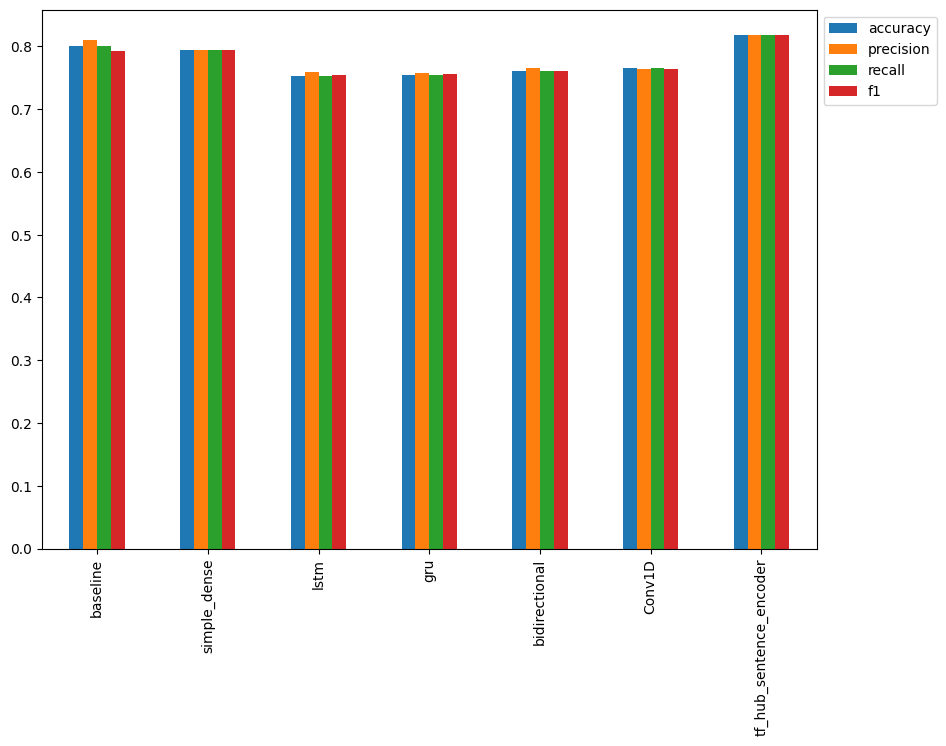

In [75]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

## Saving and loading a trained model
There are two main ways of [saving a model in TensorFlow](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model)

1. The `HDF5` format.
2. The `SaveModel` format.


In [76]:
model_6.save("model_6.h5")

If we save a model as a `HDF5`, when loading it back in, you need to let [TensorFlow know about any custom objects we've used](https://www.tensorflow.org/tutorials/keras/save_and_load#saving_custom_objects)

In [78]:
loaded_model_6 = tf.keras.models.load_model("model_6.h5"
                                            ,custom_objects={"KerasLayer":hub.KerasLayer})

In [79]:
loaded_model_6.evaluate(val_sentences,val_labels)

48/48 [==============================] - 2s 19ms/step - loss: 0.4157 - accuracy: 0.8175


[0.4156792163848877, 0.8174655437469482]

In [80]:
model_6.save("model_6_SavedModel_format")

In [81]:
loaded_model_6 = tf.keras.models.load_model("model_6_SavedModel_format")
loaded_model_6.evaluate(val_sentences,val_labels)

48/48 [==============================] - 1s 10ms/step - loss: 0.4157 - accuracy: 0.8175


[0.4156792163848877, 0.8174655437469482]